In [170]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
import swifter

import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from convertbng.util import convert_bng, convert_lonlat

plt.style.use("seaborn-poster")
plt.style.use("seaborn-colorblind")

#plt.rcParams['figure.dpi'] = 600

In [2]:
df_population = pd.read_csv("Data/PC_sectors.csv")
#df_population = df_population.iloc[0:100]

In [6]:
def postcode_shorten(postcode):
    return postcode[0:5]

header = ["Postcode", "Positional_quality_indicator", "Eastings", "Northings", "Country_code", "NHS_regional_HA_code", "NHS_HA_code", "Admin_county_code", "Admin_district_code", "Admin_ward_code"]

paths = Path("Data/Data/CSV").glob("*")

df_position = pd.concat((pd.read_csv(p, header=None, names=header) for p in paths))

# Set PC Sectors
df_position["_PC"] = df_position["Postcode"].map(postcode_shorten)

# Convert to GDF and add coordinates in lat/long
gdf_position = gpd.GeoDataFrame(df_position, geometry=gpd.points_from_xy(df_position.Eastings, df_position.Northings))
gdf_position = gdf_position.set_crs(epsg=27700)
gdf_position = gdf_position.to_crs(epsg=4326)

In [7]:
gdf_position

,Postcode,Positional_quality_indicator,Eastings,Northings,Country_code,NHS_regional_HA_code,NHS_HA_code,Admin_county_code,Admin_district_code,Admin_ward_code,_PC,geometry
0,AB101AB,10,394235,806529,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (-2.09692 57.14961)
1,AB101AF,10,394181,806429,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (-2.09781 57.14871)
2,AB101AG,10,394230,806469,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (-2.09700 57.14907)
3,AB101AH,10,394371,806359,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (-2.09466 57.14808)
4,AB101AL,10,394296,806581,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (-2.09591 57.15007)
...,...,...,...,...,...,...,...,...,...,...,...,...
646,ZE3 9JU,10,438872,1111807,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (-1.30721 59.88954)
647,ZE3 9JW,10,438975,1110038,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (-1.30570 59.87365)
648,ZE3 9JX,10,438872,1110219,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (-1.30750 59.87529)
649,ZE3 9JY,10,438498,1112029,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (-1.31385 59.89157)


<AxesSubplot:>

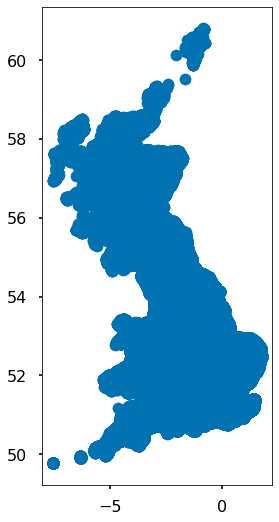

In [8]:
gdf_position.plot()

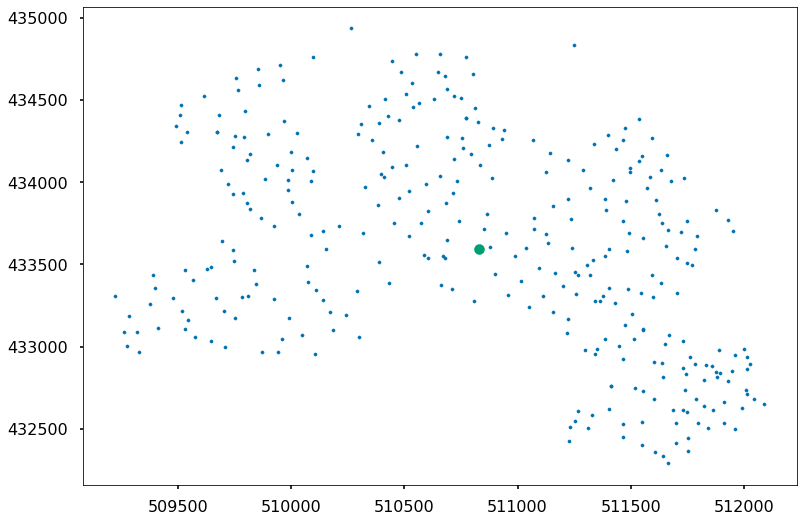

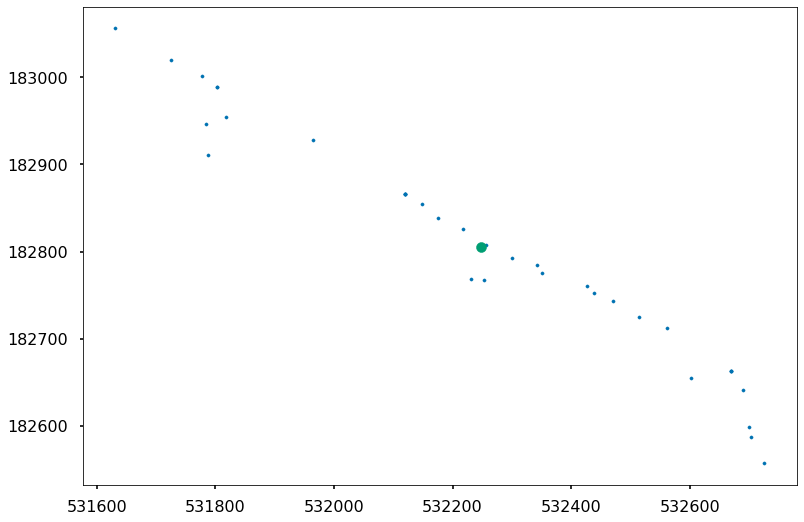

(532248.4, 182805.6)

In [9]:
def avergage_postion_of_sector(sector, df=df_position, plot=False):
    """Convert district to average PC position"""
    sector = sector[0:4] + sector[-1]
    df = df[df._PC == sector]
    
    if plot:
        plt.scatter(df.Eastings, df.Northings, s=10)
        plt.scatter(df.Eastings.mean(), df.Northings.mean(), s=100, c="C1")
        plt.show()
    
    return np.mean(df.Eastings), np.mean(df.Northings)

avergage_postion_of_sector("HU7 4", plot=True)
avergage_postion_of_sector("EC1V 2", plot=True)

In [10]:
df_population["Eastings"],  df_population["Northings"] = zip(*df_population["geography"].swifter.apply(avergage_postion_of_sector))

Pandas Apply:   0%|          | 0/8035 [00:00<?, ?it/s]

In [11]:
_df_population = df_population

In [137]:
df_population = _df_population

<AxesSubplot:>

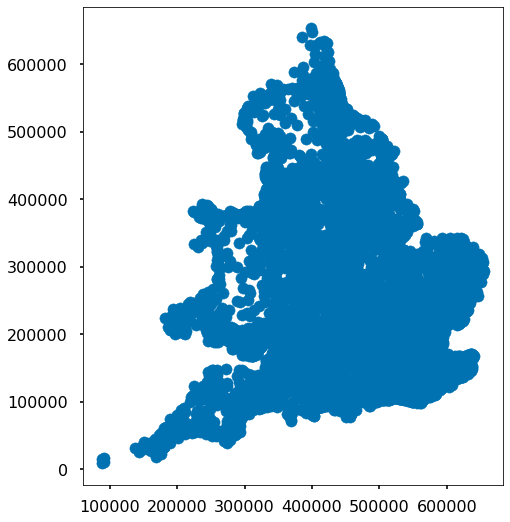

In [188]:
#df_population = df_population[(df_population.Eastings.between(300000, 400000)) & (df_population.Northings.between(300000, 400000))]
#df_population = df_population.iloc[0:20]

#df_population["Longitude"], df_population["Latitude"] = convert_lonlat(df_population.Eastings, df_population.Northings)

gdf_population = gpd.GeoDataFrame(df_population, geometry=gpd.points_from_xy(df_population.Eastings, df_population.Northings))
gdf_population = gdf_population.set_crs(epsg=27700)
gdf_population["Station"] = False
gdf_population = gdf_population.sort_values("Variable: All usual residents; measures: Value", ascending=False).reset_index(drop=True)

gdf_population.plot()

540659.4857856353 184523.41596018386
0


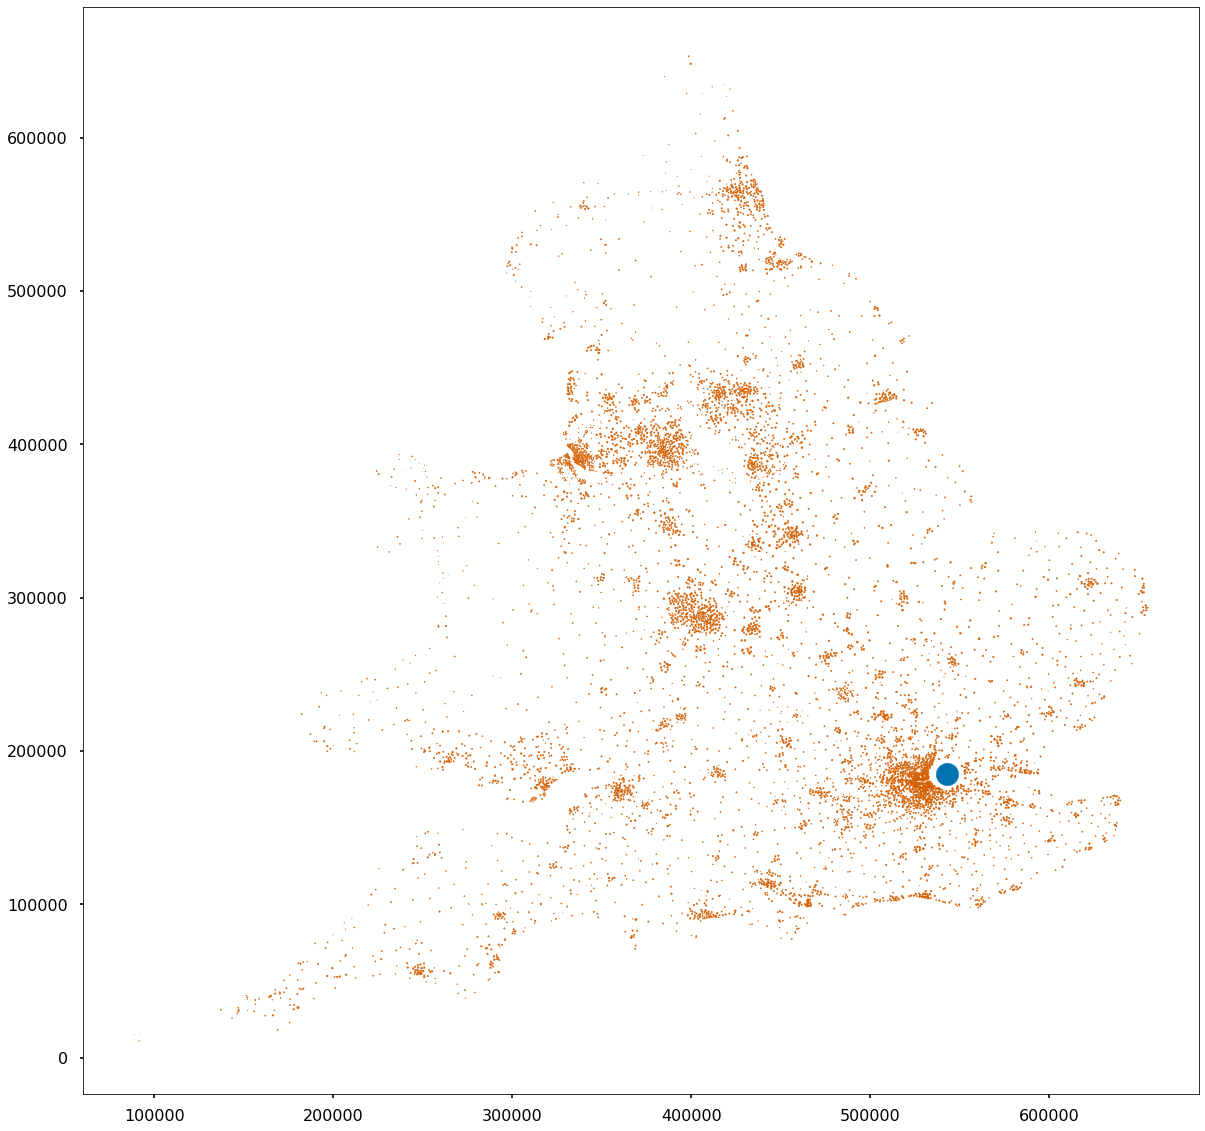

508882.32950426696 431659.3376319564
506658.8040190177 222522.20124520143
532372.1268070166 169195.66001330904
462132.23624820635 152141.26105751708
530132.8671356267 189223.01941760528
435785.5839153747 334864.4286669047
409345.45453137346 286616.0621937151
438998.9930890575 292587.35336874874
317496.013892216 178271.5470434792
514810.3339763097 181619.00506852387
385668.1777135605 394376.35785842326
404056.8167231271 266848.3976813215
425622.0898504675 322873.91787373525
444436.9582746912 347281.82820568746
546074.0773378217 258178.92813578158
520869.73721995106 167846.5038240799
561459.3488279153 272687.1871433875
600404.4677320308 225527.34070850303
429469.6168780087 562416.280003948
488187.46991302347 192823.5348793667
361443.29675217596 391985.1093150032
529211.7945998391 137565.95858451317
535388.4587761695 176465.0149111761
459089.4557873723 303938.5148213876
496924.1469665977 179859.100218962
462099.30196910317 102194.40928657762
485812.79640360165 165444.10635203993
370952.64

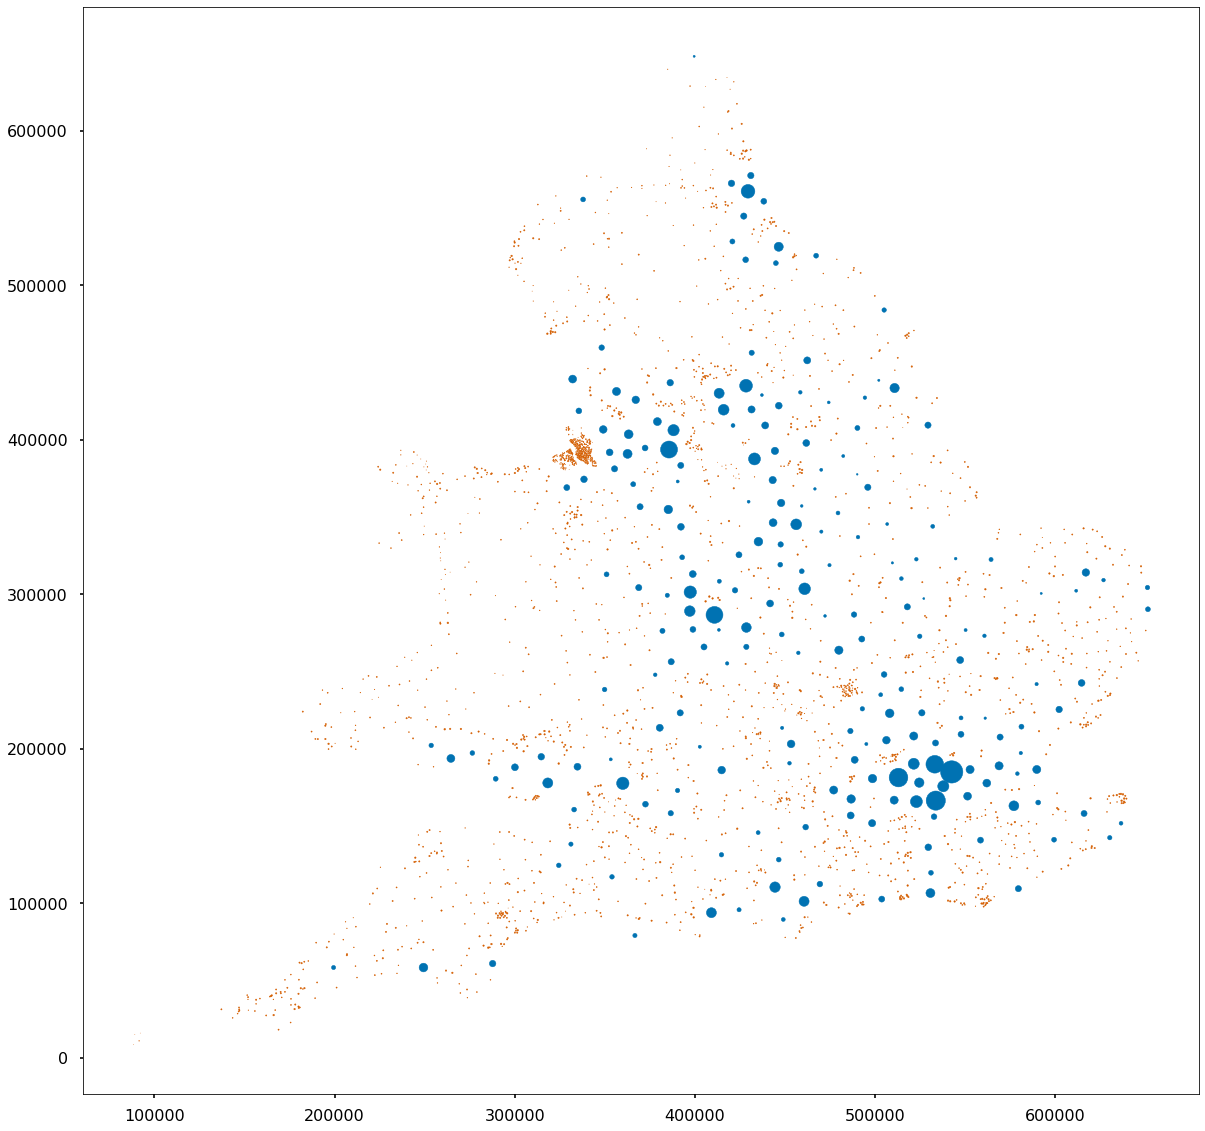

326693.5842439134 194711.2479413957
345213.53211521206 172410.8815303617
261535.10385813142 281194.9252335171
444977.3756048186 240008.92629067233
409874.6304555089 297128.451520194
485639.1325334886 238371.6572696827
287110.61065134365 73976.60259776747
381401.9129083607 126297.9655091523
626751.1424228599 232520.8535850277
399143.7323279601 397463.7207122281
577732.0803491558 286152.552522758
521613.84013010404 357730.8425540044
480263.9151497556 136454.85428186468
636020.181680826 168130.09077036902
546659.7842398576 309328.9791011778
486988.91480283637 180965.47031034288
426500.5068017234 585577.8761959657
457048.43218290946 382113.99228670786
576661.2424543148 150273.0571261101
304786.98689066566 205049.05905187348
418801.5490863461 346489.04910503625
263464.69710909686 213769.60434302982
515844.4136860824 105027.8705183257
599746.5254259704 313697.0267006075
541836.9510037404 140557.28491183772
559200.9360163383 106270.36134885935
396701.50961068855 93328.51167379276
379739.02211

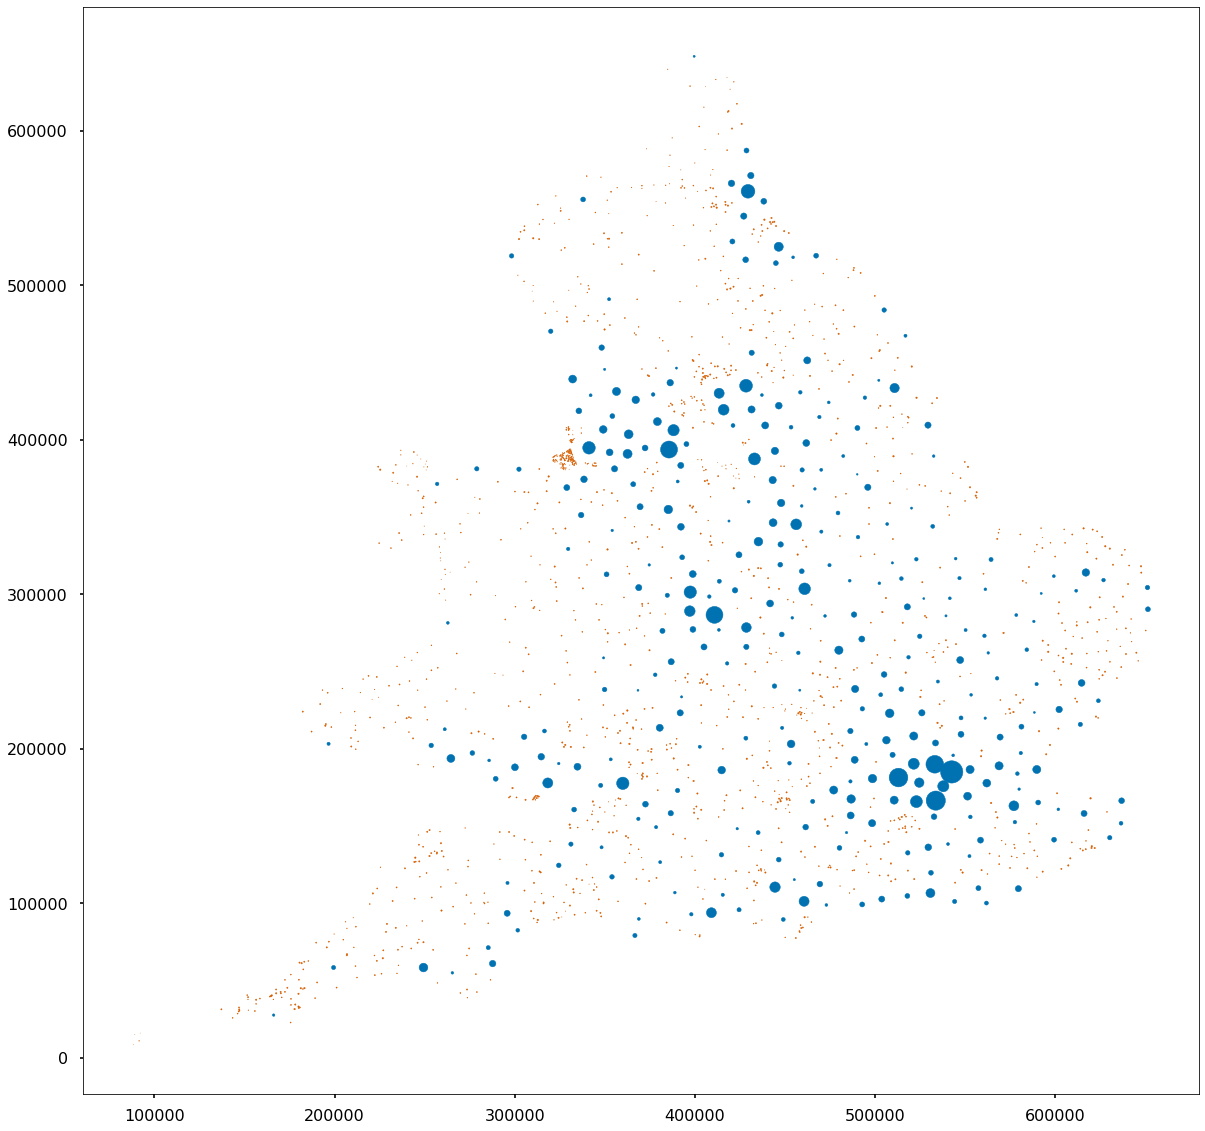

535874.8397572393 215399.19646360778
477276.3697844328 198014.7004950211
458093.98579682194 223278.4282589131
576865.78926152 227883.1874083702
246974.3306625441 129755.5551506027
331502.5798443839 149816.82862253775
597566.9230343284 263273.66538330185
471235.20661185327 234023.45763216668
434559.72110722703 116987.8995693705
471021.167328984 207923.602667629
626995.0436663893 330386.48152823764
311015.3830866291 168388.7817458385
363288.25751988357 222115.2067429988
442462.62041405594 481275.66982943006
469125.3652437199 250089.82985826934
440495.327192294 539862.2787770184
618490.8106307515 135976.91039898744
459445.3178979317 329682.4095944082
448359.7379293091 166695.35208240885
311902.8644854685 90854.66839802719
319256.66161675047 376183.2741799207
433787.39786050434 314500.35047843657
571293.5169082126 275052.1111111111
429804.7801162992 194282.45690569683
526249.6629565546 425954.8036878857
405293.78566516086 441373.0085715127
298585.82949971413 170937.36453276256
413623.31137

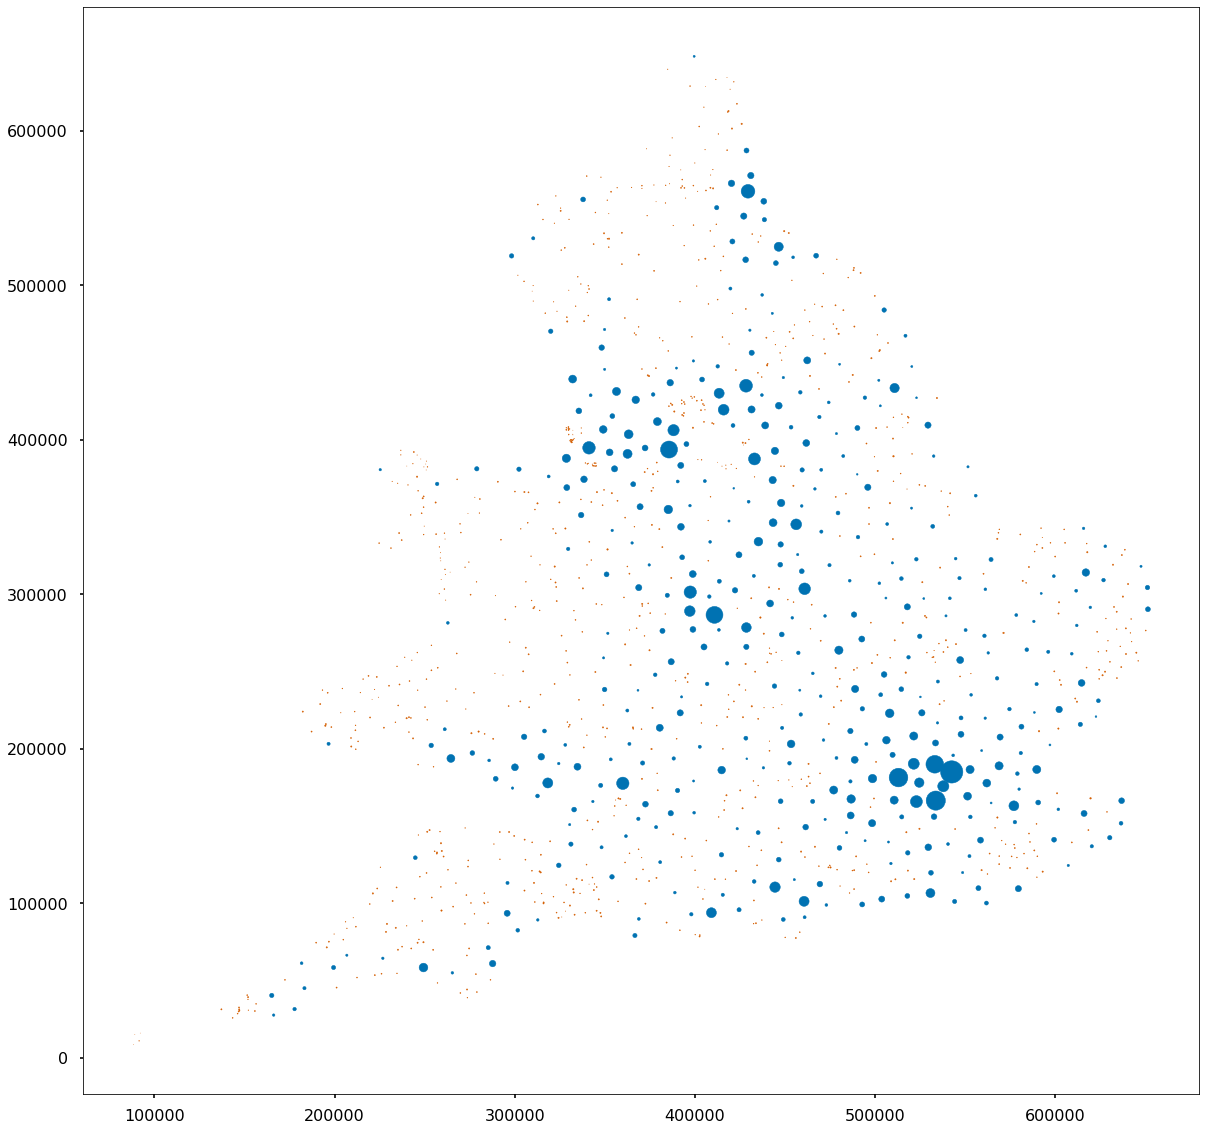

193947.9442264994 214268.07764693242
366814.01723667054 213360.97392337344
375927.92673992674 199885.8315018315
431464.63343901123 223326.1145215263
450695.4971881911 534618.77493971
351761.0640945717 530629.6409223885
281200.25107411924 209549.12552645712
261726.6557775704 96242.4551211939
423453.6103434409 603216.138034441
430393.2662468735 252851.5479246475
333156.34365202487 109908.13410874063
480244.6916301084 470761.1374531625
617690.1480442698 328842.41301088664
567502.0400950992 153559.77206519988
474595.3263195874 123346.59698884007
376154.01533519954 378900.5972025116
374650.7723667952 443222.2010651498
515340.4605809129 281630.0705394191
358014.0546444491 166321.80070412718
320372.39308010123 316331.1568400076
390826.52628481295 420863.4665177179
601734.0 213133.6626984127
258298.27129503805 134843.5263100593
221649.73040598052 105868.89010971673
401247.7986117849 409347.64128129656
246163.29604442444 376153.51538081735
627798.0513467563 249242.60614976304
486753.49944275804

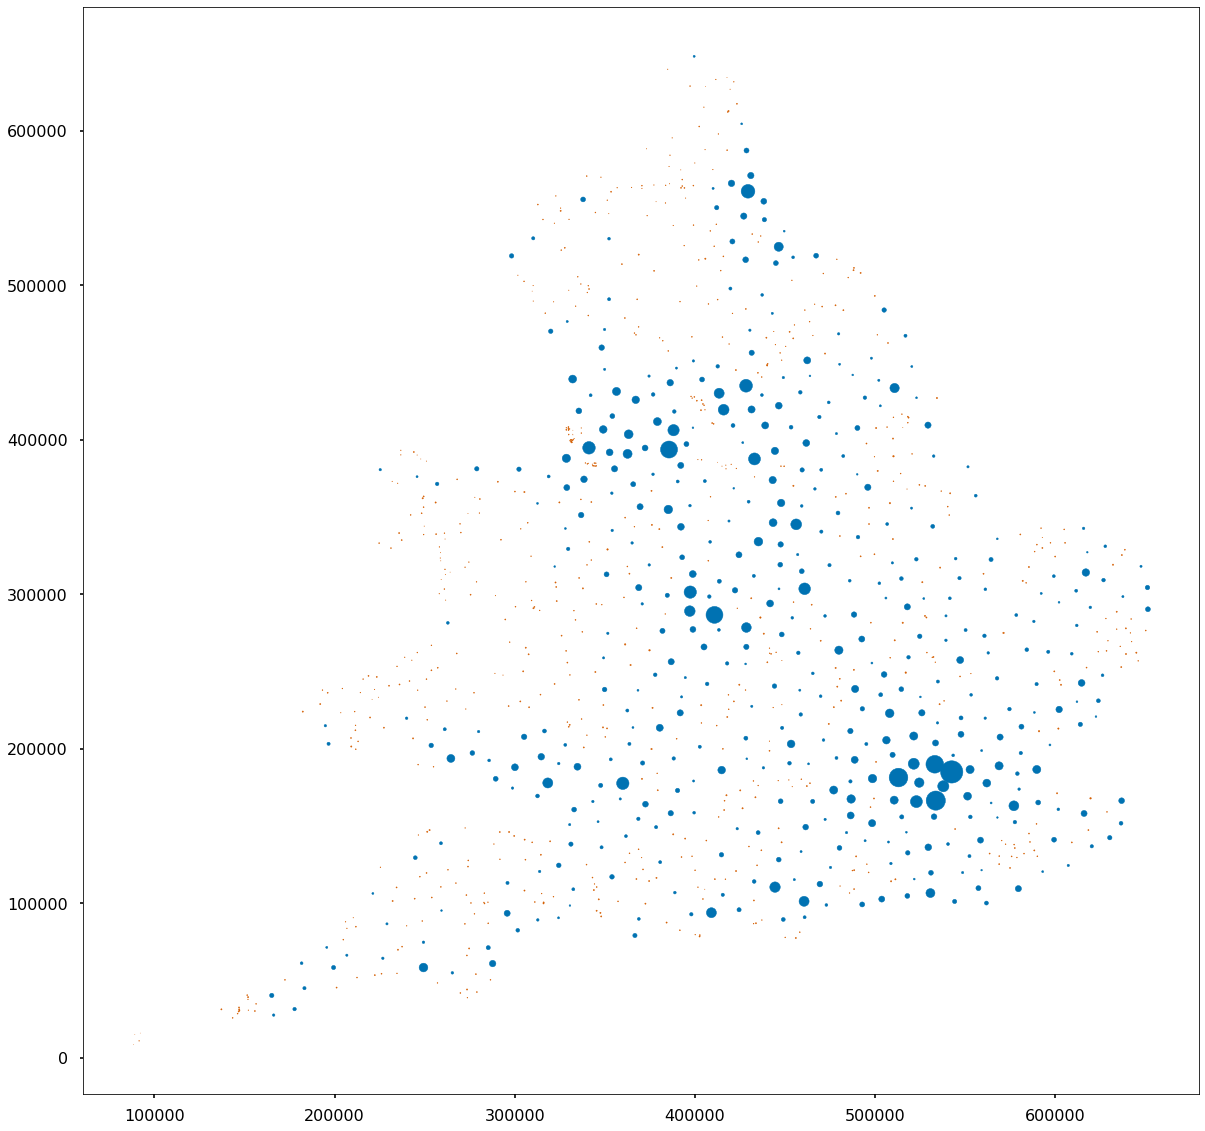

502454.02261940355 407893.4480704643
250790.56840339 359426.71961705043
419147.96440673224 167993.15090575404
583645.8396076685 311935.4051199542
406169.7739334896 519147.47450971795
438957.73239520483 272419.9073631179
419946.839372319 614179.0263348208
510064.51638269995 114868.58157059056
634313.2951054352 322111.09215095796
303308.50261869404 366391.32478668913
310918.99496613146 291893.08606040775
479059.28478453495 249459.42561455877
376493.07142857136 226548.54285714286
526228.5907172996 307889.1983122363
501063.86970147624 381929.00659912545
641904.2662712926 262528.74314768024
251486.2000057994 146574.17795790877
510902.5941422594 270247.67364016734
391058.1038293492 143371.60808203046
210474.56616621866 203213.81489384704
423865.88911066746 239062.29472471756
373097.79819358175 181630.83133318048
601795.4204648657 245141.50521197278
336966.3410259574 306719.5912019541
601003.5053191489 171223.36170212767
298583.9549660959 144319.70852145672
147367.38540373053 31794.7836322335

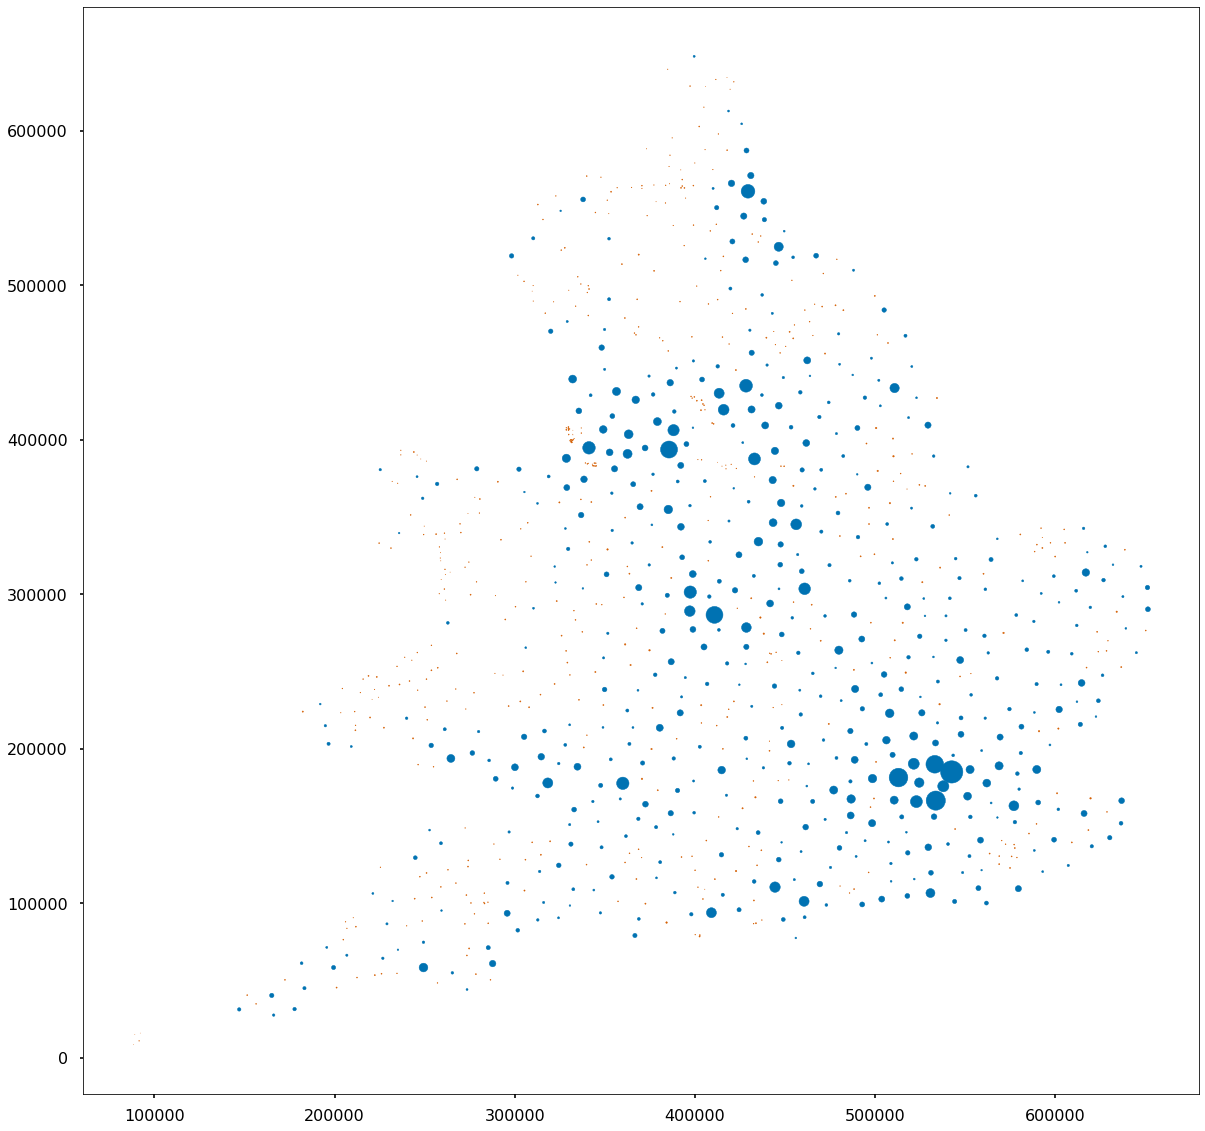

441349.58822219505 465779.7143456118
402240.5686979231 79042.01656687832
636633.7660377359 252933.50188679245
416392.46361803944 220165.21553054848
274165.49723683705 68826.956077325
480261.11038203986 485536.11882935546
290634.7969924812 372937.12406015035
498545.4106228819 165415.9344609471
434199.52388974396 87439.60167962946
560179.4947368421 313361.9894736842
338860.5658298792 203383.00557557296
215581.15559335423 220282.9787659792
310436.7259441426 132795.75835075628
227406.34913793104 213716.15086206896
363213.78181454435 315273.1894489947
480830.487473767 364103.0408080128
467753.0444893158 272798.18661335844
453438.3077230099 467998.17139198666
305573.8484453636 228785.6703464512
432749.4085365854 101841.57317073169
319662.37727272726 140128.20454545456
572988.7072917534 127215.22753714236
222868.95459947005 244524.3732429582
224017.4840436117 53910.594438416534
379375.9568965517 173193.77586206896
323299.2348178138 295662.65991902835
500541.07762557076 191567.40639269407
4027

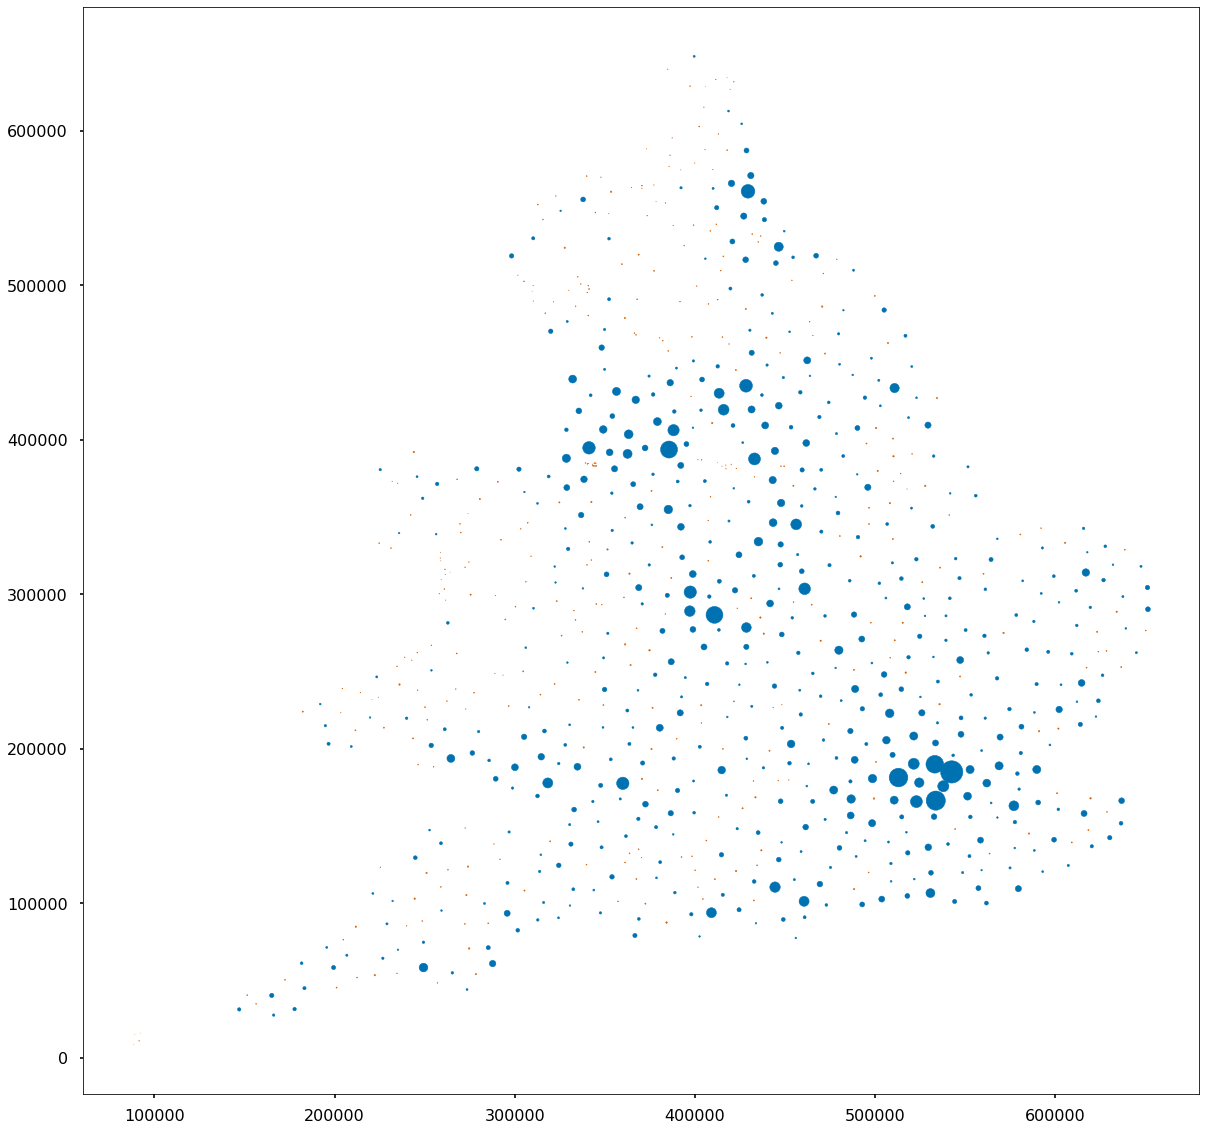

434508.9427083333 124588.52083333333
394984.252539457 130162.5544206421
407453.4736842105 321812.4254385965
346425.3978995557 293637.9153854028
626486.4884734942 263230.68156892975
312830.035 552389.365
250823.84340588516 223117.20728832908
650199.1095890411 276611.6712328767
340087.412001214 498391.9070439011
285309.76978417265 87047.90647482015
367982.3846153846 491016.4389140271
339855.43406593404 125065.5054945055
415138.52498695214 514623.07922208257
402408.78200692043 602912.8685121108
172485.22222222222 50475.51666666667
363764.29224891344 129317.62500017187
268060.84523809527 374466.1488095238
417896.3138075314 587566.9163179917
367658.9162790698 278053.7395348837
272337.68859649124 86708.52631578948
403381.4482196523 105753.165840141
448717.06151931593 382959.712119506
434198.7381095749 531286.1916280296
389869.60365853657 206557.40853658537
496419.23039215687 119989.5
305742.6775110684 344889.97794403805
153814.8601615305 37959.777511569395
365241.97207252 130991.45099004875


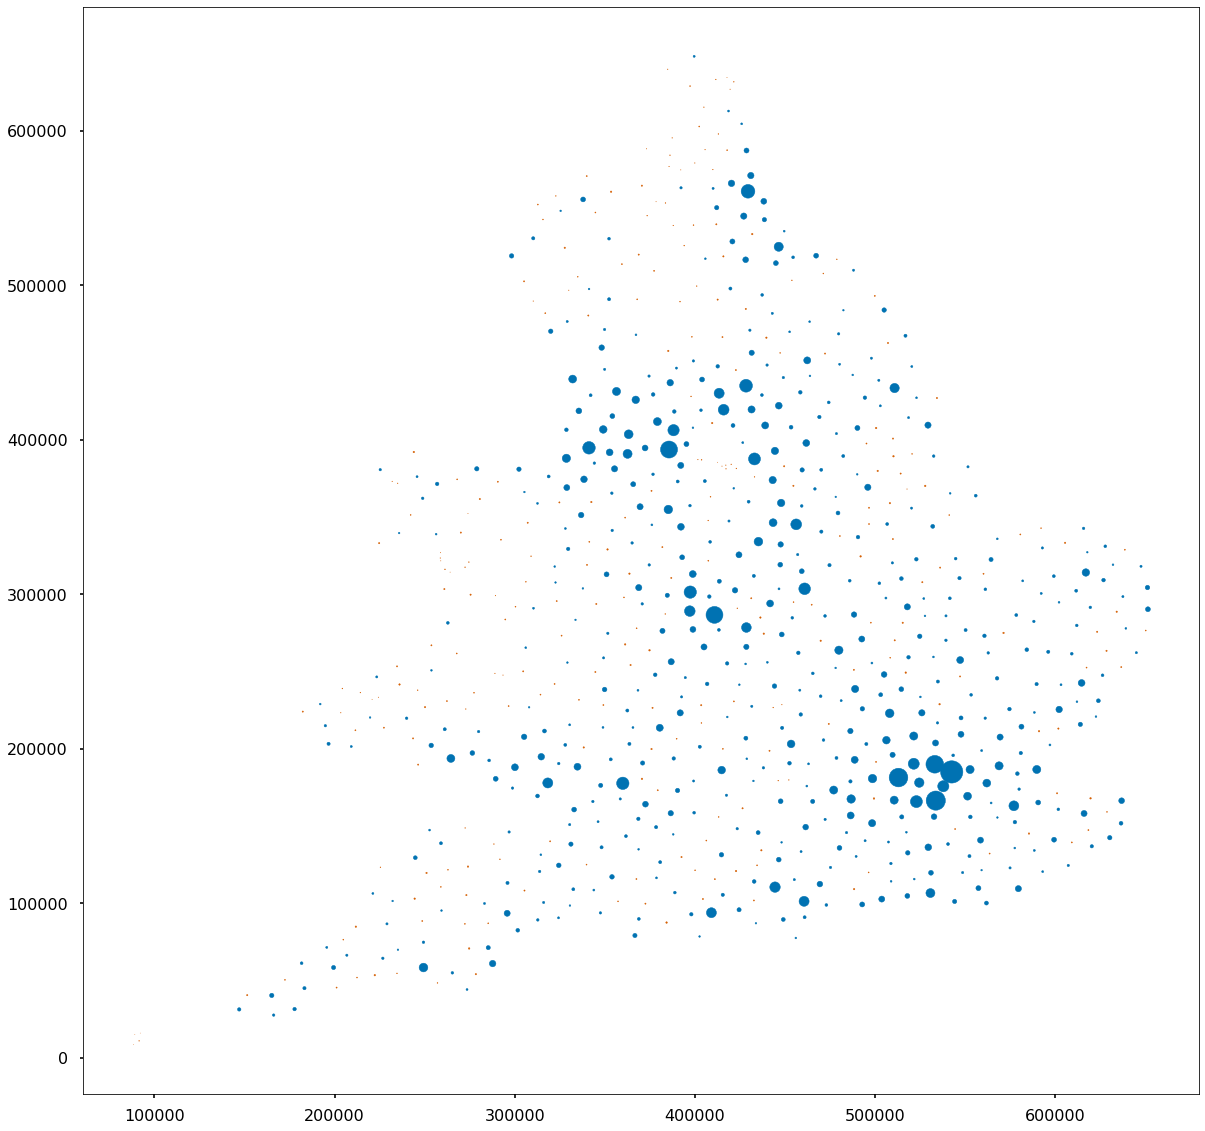

260606.83165995244 318473.7023779154
394065.6923076923 525816.6515837105
234660.6691729323 54648.255639097755
257141.45801526718 48463.71755725191
403924.5577093986 387024.646593756
478768.68595041323 516932.743801653
240089.99620936415 241679.21975457744
204352.74025974027 239066.70779220783
309072.7210884354 324719.7551020408
407377.55555555556 347834.69444444444
453826.0 503326.2822580645
383554.03205128206 287324.6923076923
423539.7228915663 291005.813253012
273462.2083579699 319186.5164536157
413040.30625 598080.4125
373510.1073446328 545198.779661017
448804.33469158923 179623.9341782645
401010.7358490566 499588.0424528302
382603.14854339743 553573.5659284106
419447.60204363347 382566.27627554425
445175.9744094842 227422.67826706762
420574.16789248283 630949.2032298087
322823.1208791209 557963.6483516484
225478.61 123332.09
433096.8965517241 376079.7931034483
215466.5557232403 235674.37873597635
385981.09016064287 581603.368511512
288453.5585585586 138369.7792792793
417408.7366160

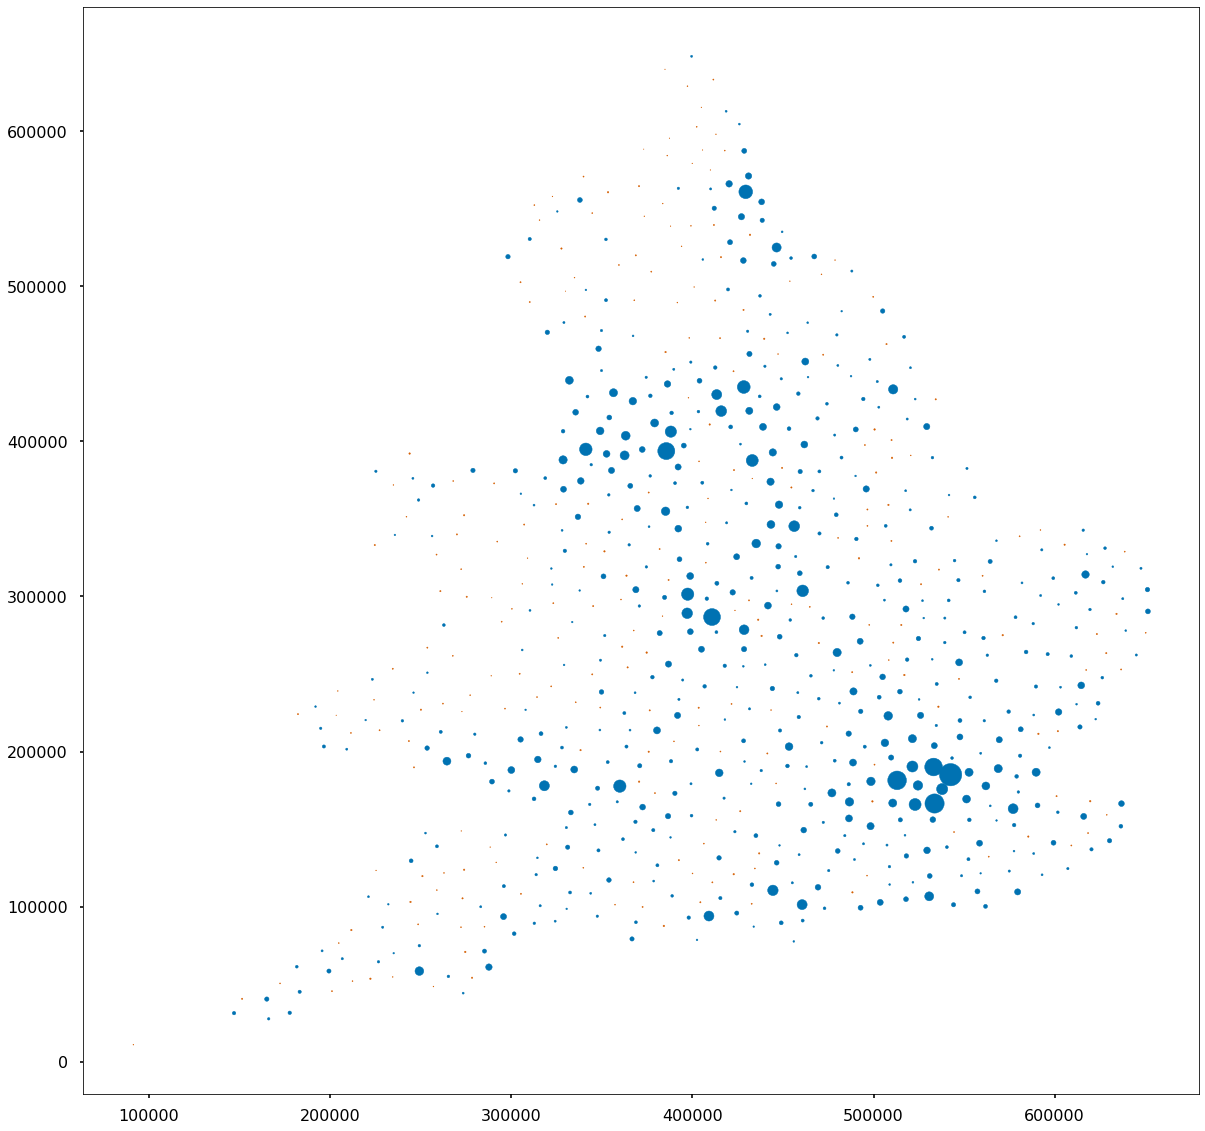

In [189]:
pop_name = "Variable: All usual residents; measures: Value"

#ds = [1000, 2000, 3000, 5000, 15000]
#sths = [60000, 40000, 30000, 10000, ]

#ds = [3000, 6000, 15000, 20000]
#sths = [50000, 30000, 20000, 10000]

#ds = [10000, 20000]
#sths = [100000, 10000]


ds = [10000]
sths = [10000]

for distance, station_th in zip(ds, sths):
    for index in list(gdf_population.index):

        if index in list(gdf_population.index):


            area = gdf_population.loc[index].geometry.buffer(distance)
            within_min_distance = gdf_population.geometry.within(area)
            within_min_distance = within_min_distance & (gdf_population.index != index) & (gdf_population.Station == False)

            _df = gdf_population[within_min_distance].append(gdf_population.loc[index])
            
            
            
            new_pop = gdf_population.at[index, pop_name] + gdf_population[within_min_distance][pop_name].sum()
            
            print((_df.geometry.x * _df[pop_name]).sum() / new_pop, (_df.geometry.y * _df[pop_name]).sum() / new_pop)
            
            gdf_population.at[index, "geometry"] = Point(((_df.geometry.x * _df[pop_name]).sum() / new_pop), ((_df.geometry.y * _df[pop_name]).sum() / new_pop))

            gdf_population.at[index, pop_name] = new_pop
            
            gdf_population.drop(gdf_population[within_min_distance].index, inplace=True)

            if gdf_population.at[index, pop_name] > station_th:
                gdf_population.at[index,"Station"] = True
                
        else:
            pass#print("pass")

        if (index % 1000) == 0:
            print(index)
            fig, ax = plt.subplots(figsize=(20,20))
            ax.scatter(gdf_population[gdf_population.Station == True].Eastings, gdf_population[gdf_population.Station == True].Northings, c='C0', s=gdf_population[gdf_population.Station == True]["Variable: All usual residents; measures: Value"]/4000, label="Station")
            ax.scatter(gdf_population[gdf_population.Station == False].Eastings, gdf_population[gdf_population.Station == False].Northings, c='C2', s=gdf_population[gdf_population.Station == False]["Variable: All usual residents; measures: Value"]/4000)
            plt.show()
        

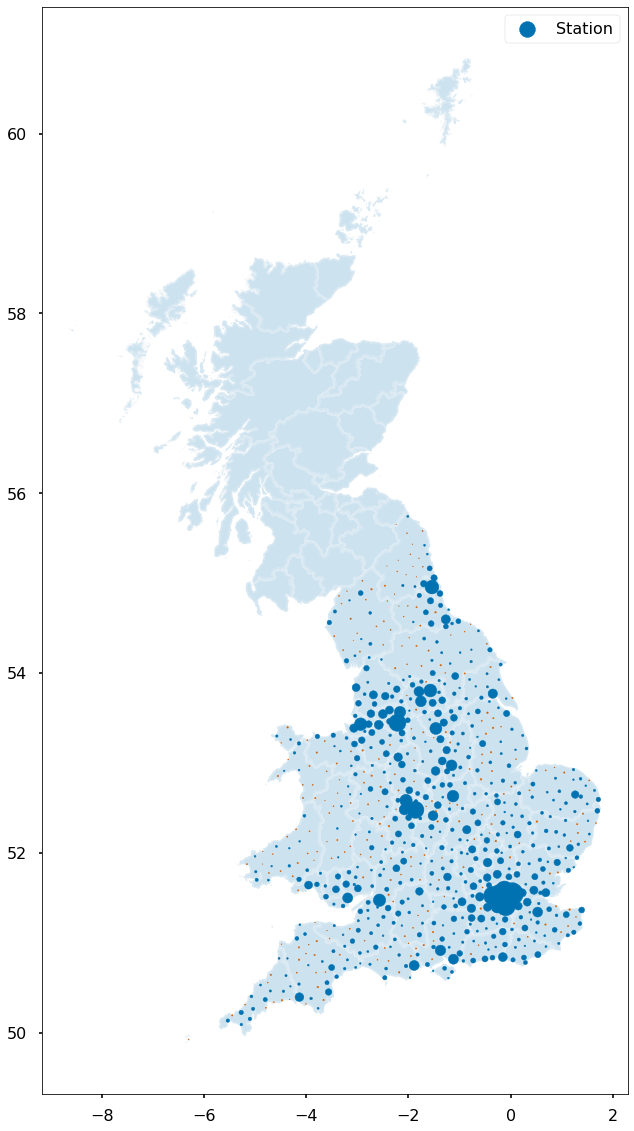

In [193]:
fig, ax = plt.subplots(figsize=(20,20))

uk = gpd.read_file("Data/bdline_gpkg_gb/data/bdline_gb.gpkg")
uk = uk.to_crs(epsg=4326)
ax = uk.plot(ax=ax,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)

gdf_population = gdf_population.to_crs(epsg=4326)

ax.scatter(gdf_population[gdf_population.Station == True].geometry.x, gdf_population[gdf_population.Station == True].geometry.y, c='C0', s=gdf_population[gdf_population.Station == True]["Variable: All usual residents; measures: Value"]/4000, label="Station")
ax.scatter(gdf_population[gdf_population.Station == False].geometry.x, gdf_population[gdf_population.Station == False].geometry.y, c='C2', s=gdf_population[gdf_population.Station == False]["Variable: All usual residents; measures: Value"]/4000)
ax.legend()

(-1.0, 1.0)

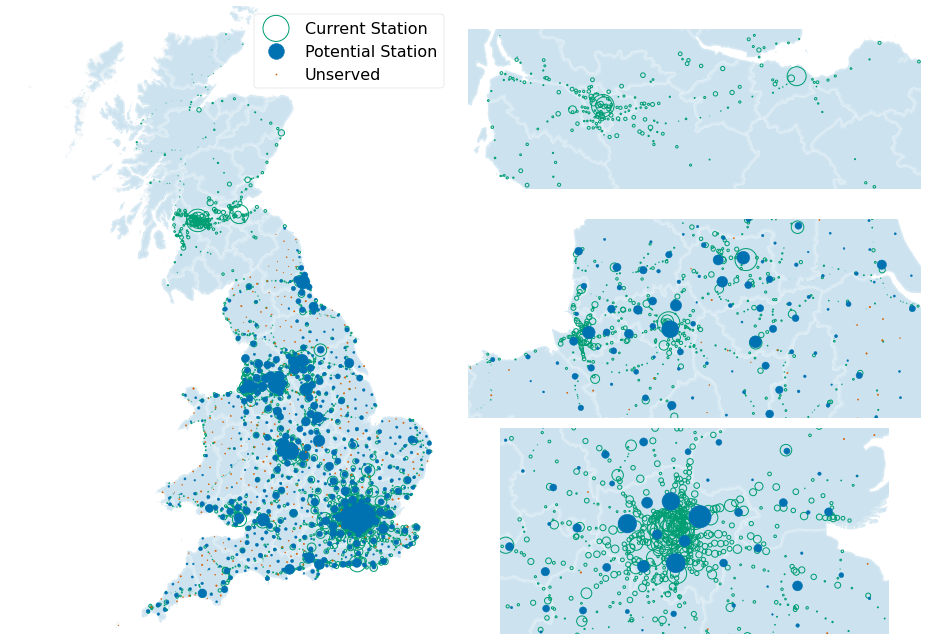

In [224]:
# Import Station Data
df_stations = pd.read_csv("Data/GB stations.csv")
df_stations["Eastings"], df_stations["Northings"] = convert_bng(df_stations.Longitude, df_stations.Latitude)
gdf = gpd.GeoDataFrame(df_stations, geometry=gpd.points_from_xy(df_stations.Longitude, df_stations.Latitude))

# Import background map
uk = gpd.read_file("Data/bdline_gpkg_gb/data/bdline_gb.gpkg")
uk = uk.to_crs(epsg=4326)


fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3,2)

axl = fig.add_subplot(gs[:, 0], frameon=False)
axl.set_axis_off()

axtr = fig.add_subplot(gs[0, 1], frameon=False)
axtr.set_axis_off()
axmr = fig.add_subplot(gs[1, 1], frameon=False)
axmr.set_axis_off()
axbr = fig.add_subplot(gs[2, 1], frameon=False)
axbr.set_axis_off()


def plot(ax, norm=4000):
    # Background map
    ax = uk.plot(ax=ax,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)
    # Current station stats
    ax.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/(norm * 16), c="None", edgecolors="C1", linewidth=1, label="Current Station")
    ##ax.scatter(df_stations["Longitude"], df_stations["Latitude"], c="None", edgecolors="C4", s=0.1)
    # Population model
    ax.scatter(gdf_population[gdf_population.Station == True].geometry.x, gdf_population[gdf_population.Station == True].geometry.y, c='C0', s=gdf_population[gdf_population.Station == True]["Variable: All usual residents; measures: Value"]/norm, label="Potential Station")
    ax.scatter(gdf_population[gdf_population.Station == False].geometry.x, gdf_population[gdf_population.Station == False].geometry.y, c='C2', s=gdf_population[gdf_population.Station == False]["Variable: All usual residents; measures: Value"]/norm, label="Unserved")
    
    
    return ax 


axl = plot(axl)
axl.legend()
axl.set_ylim((49.8, 59))

axtr = plot(axtr)
axtr.set_ylim((55.6, 56.1))
axtr.set_xlim((-5, -2.5))

axmr = plot(axmr)
axmr.set_ylim((53, 54))
axmr.set_xlim((-4, 0))

axbr = plot(axbr)
axbr.set_ylim((51.2, 51.8))
axbr.set_xlim((-1, 1))


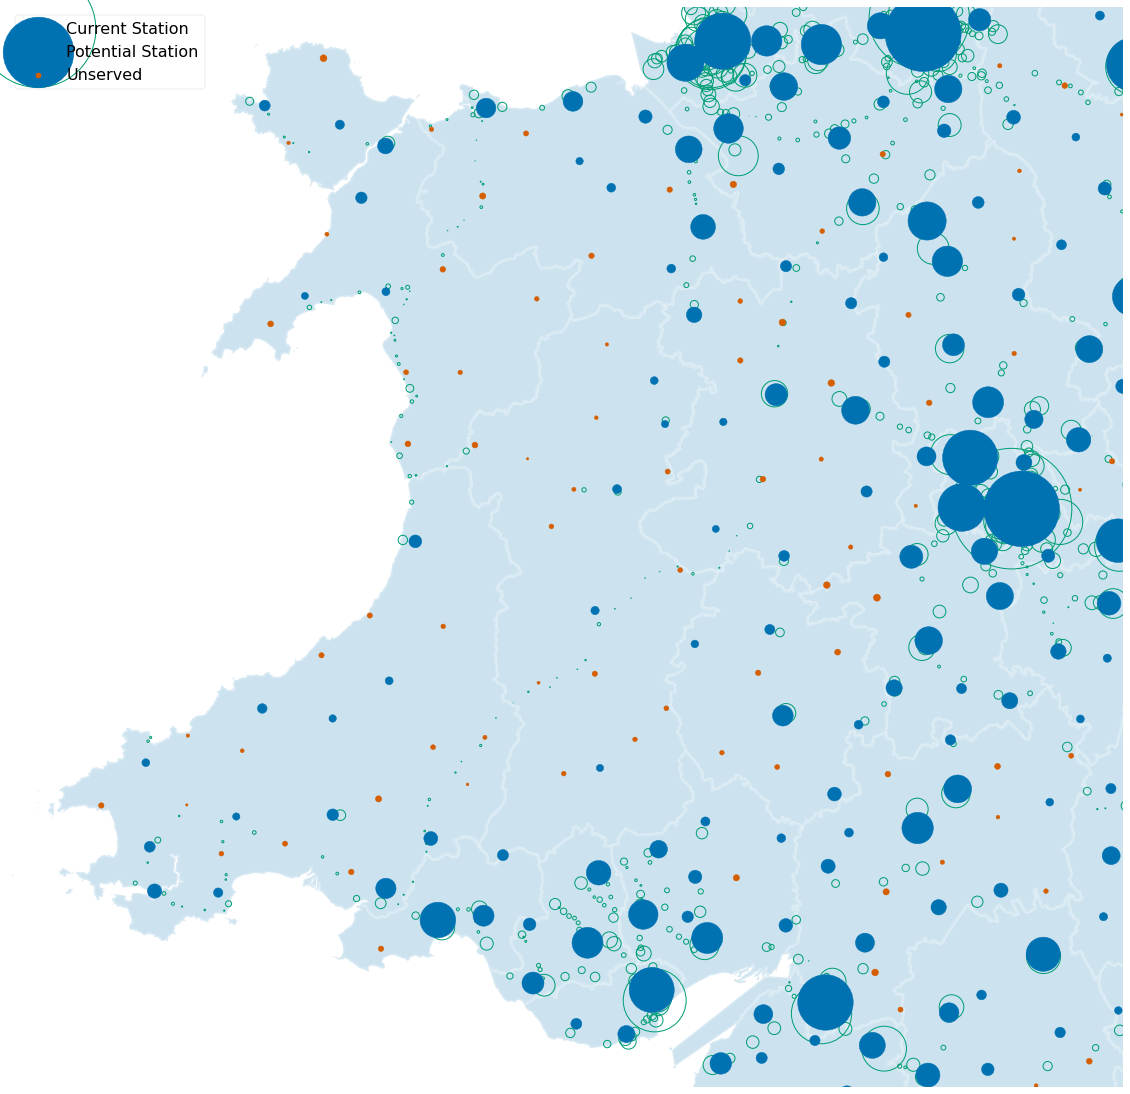

In [225]:
fig, ax = plt.subplots(figsize=(20,20))

ax = plot(ax, norm=200)
ax.set_ylim((51.3, 53.5))
ax.set_xlim((-5.5, -1.5))
ax.set_axis_off()
ax.legend()